In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
iris = load_iris()

In [7]:
df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=['sep_l', 'sep_w','pet_l','pet_w','target'])

In [8]:
df

,sep_l,sep_w,pet_l,pet_w,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
import seaborn as sns

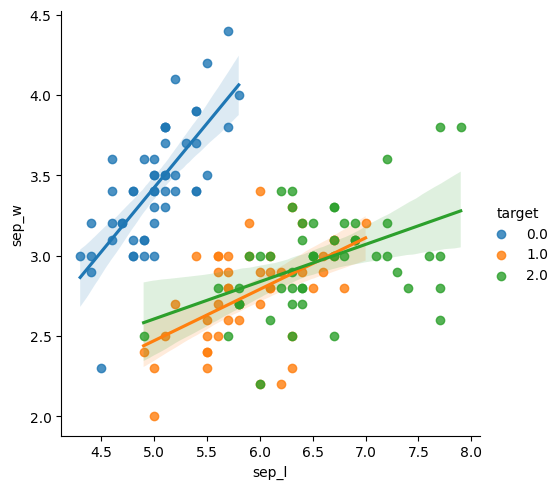

In [11]:
sns.lmplot(x='sep_l',y='sep_w', hue='target', data=df)

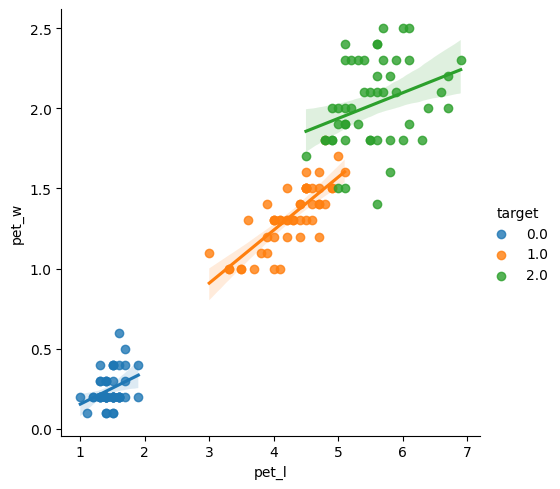

In [12]:
sns.lmplot(x='pet_l',y='pet_w', hue='target', data=df)

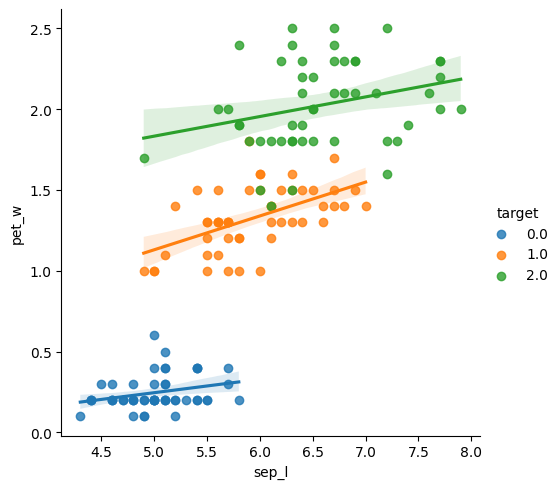

In [13]:
sns.lmplot(x='sep_l',y='pet_w', hue='target', data=df)

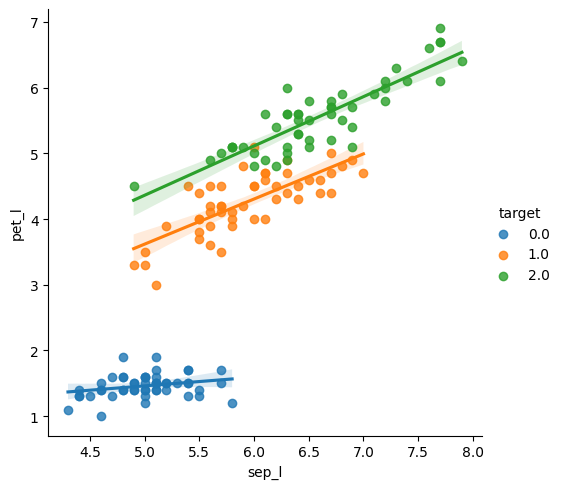

In [14]:
sns.lmplot(x='sep_l',y='pet_l', hue='target', data=df)

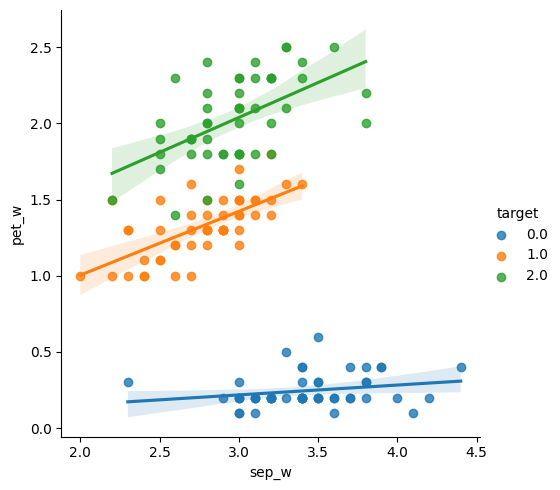

In [15]:
sns.lmplot(x='sep_w',y='pet_w', hue='target', data=df)

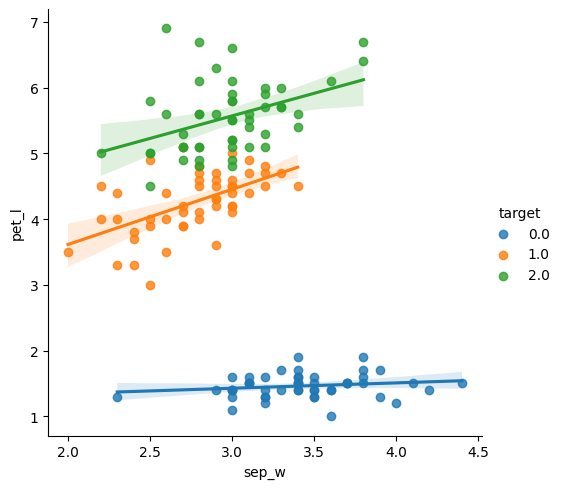

In [16]:
sns.lmplot(x='sep_w',y='pet_l', hue='target', data=df)

In [17]:
# train & test split
# we use 70-80% of our data for training; 20-30% for testing

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:4], df['target'], test_size=0.3)

In [18]:
X_train

,sep_l,sep_w,pet_l,pet_w
148,6.2,3.4,5.4,2.3
140,6.7,3.1,5.6,2.4
0,5.1,3.5,1.4,0.2
26,5.0,3.4,1.6,0.4
73,6.1,2.8,4.7,1.2
...,...,...,...,...
42,4.4,3.2,1.3,0.2
35,5.0,3.2,1.2,0.2
52,6.9,3.1,4.9,1.5
78,6.0,2.9,4.5,1.5


In [22]:
X_test.head(
)

,sep_l,sep_w,pet_l,pet_w
33,5.5,4.2,1.4,0.2
145,6.7,3.0,5.2,2.3
14,5.8,4.0,1.2,0.2
15,5.7,4.4,1.5,0.4
141,6.9,3.1,5.1,2.3


In [23]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
pred = knn.predict(X_test)

In [26]:
pred

array([0., 2., 0., 0., 2., 2., 1., 0., 2., 2., 1., 0., 2., 1., 0., 1., 2.,
       1., 2., 2., 2., 0., 1., 0., 2., 0., 1., 1., 2., 0., 1., 0., 1., 1.,
       2., 1., 1., 2., 0., 0., 2., 1., 2., 0., 1.])

In [29]:
accuracy_score(pred, y_test)

0.9555555555555556

In [30]:
df_check = pd.DataFrame(np.c_[pred, y_test])

In [32]:
df_check['check'] = df_check[0]-df_check[1]

In [34]:
df_check[df_check['check'] != 0]

,0,1,check
16,2.0,1.0,1.0
32,1.0,2.0,-1.0


In [35]:
X_test.iloc[[16,32]]

,sep_l,sep_w,pet_l,pet_w
72,6.3,2.5,4.9,1.5
106,4.9,2.5,4.5,1.7


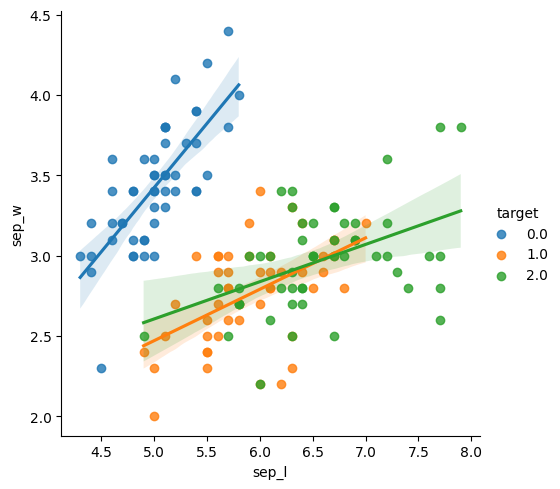

In [37]:
sns.lmplot(x='sep_l',y='sep_w',data=df, hue='target')

In [38]:
accuracy = []
for k in [3,5,7,9,11,13,15,21,25,31,39]:
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:4], df['target'], test_size=0.3)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    accuracy.append(accuracy_score(pred,y_test))


In [41]:
results = pd.DataFrame(accuracy, index=[3,5,7,9,11,13,15,21,25,31,39])
results

,0
3,0.955556
5,0.977778
7,0.977778
9,0.977778
11,1.000000
13,0.955556
15,0.955556
21,0.888889
25,0.933333
31,0.911111


In [47]:
avg_accuracy = []
for k in [3,5,7,9,11,13,15,21,31,51,81]:
    accuracies=[]
    for i in range(20):
        X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:4], df['target'], test_size=0.3)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        accuracies.append(accuracy_score(pred,y_test))
    avg_accuracy.append(np.mean(accuracies))

In [48]:
results2 = pd.DataFrame(avg_accuracy, index=[3,5,7,9,11,13,15,21,31,51,81])
results2

,0
3,0.962222
5,0.968889
7,0.965556
9,0.962222
11,0.962222
13,0.958889
15,0.965556
21,0.938889
31,0.938889
51,0.886667
